# Perform Clustering - Hierarchical for the crime data and identify the number of clusters formed and draw inferences.


In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.pyplot as mtp 

In [2]:
crime = pd.read_csv('C:/Users/ssair/datasets/crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime2=crime.drop(['Unnamed: 0'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame 
crime3 = norm_func(crime2)
crime3

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


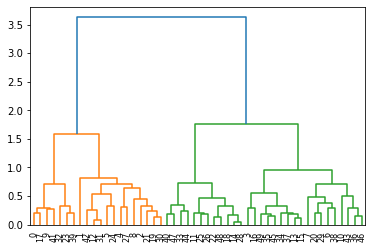

In [7]:
# Create Dendrograms
dendograms=sch.dendrogram(sch.linkage(crime3,'ward'))

In [8]:
# Create Clusters (y)
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [9]:
y=pd.DataFrame(hc.fit_predict(crime2),columns=['clustersid'])
y['clustersid'].value_counts()

0    14
1    10
3    10
4    10
2     6
Name: clustersid, dtype: int64

In [10]:
# Adding clusters to dataset
crime2['clustersid']=hc.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [11]:
crime2.groupby('clustersid').agg(['mean']).reset_index()


,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,8.214286,173.285714,70.642857,22.842857
1,1,12.080000,253.400000,66.000000,27.450000
2,2,11.366667,304.500000,72.166667,29.916667
3,3,5.590000,112.400000,65.600000,17.270000
4,4,2.950000,62.700000,53.900000,11.510000


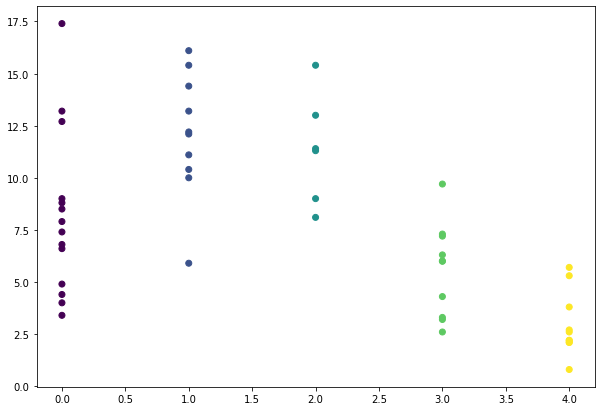

In [12]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clustersid'],crime2['Murder'], c=hc.labels_)